# Analysis 2

In [2]:
# Merge the Green Taxi Files for the Month Jan - June

import glob
import pandas as pd
from pandas import DataFrame
frame = pd.DataFrame()
list=[]
for files in glob.iglob("../../Data/RawGreen/*.csv"):
    df = pd.read_csv(files,sep=',')
    list.append(df)
frame = pd.concat(list)
frame.rename(columns = {'lpep_pickup_datetime':'pickup_datetime'},inplace=True)
frame.rename(columns = {'Lpep_dropoff_datetime':'dropoff_datetime'},inplace=True)


In [6]:
#Average speed change with respect to total Trips
import numpy as np
df=DataFrame(frame,columns=['pickup_datetime','dropoff_datetime','Trip_distance'])
df.to_csv("output/filtertrip.csv")
#df=pd.read_csv("output/filtertrip.csv")
df["Trip_distance"]=df["Trip_distance"].round()
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])
df['delta']=df.dropoff_datetime-df.pickup_datetime
df['delta']=pd.to_datetime(df["delta"])
df['delta_minutes']=df['delta'].dt.hour*60+df['delta'].dt.hour
df['speed']=(df['Trip_distance'])/(df['delta_minutes']/60)
df['speed']=df['speed'].round()
df.replace([np.inf, -np.inf], 0.0)
df=df[df.speed!=0.0]
pdf=df.groupby(['speed'])['speed'].agg({'count'}).reset_index()
pdf=pdf.replace([np.inf, -np.inf], 0.0)
pdf=pdf[pdf.speed!=0.0]
pdf['percentile']=(pdf['count']*100)/pdf['count'].sum()
pdf.to_csv("output/SpeedChange.csv")

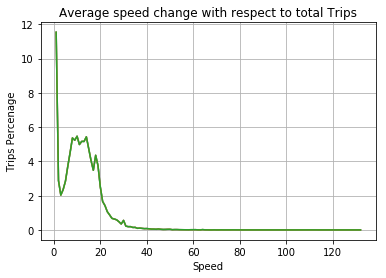

In [8]:
#Matplot lib Average speed change with respect to total Trips

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
plotdata=pd.read_csv("output/SpeedChange.csv")

t = plotdata['speed'].tolist()
s = plotdata['percentile'].tolist()
plt.plot(t, s)

plt.xlabel('Speed')
plt.ylabel('Trips Percenage')
plt.title('Average speed change with respect to total Trips')
plt.grid(True)
fig = plt.figure(1, figsize=(8,8))
plt.savefig("graph/speedChange_trips.png")
plt.show()

In [10]:
#Average speed change with respect to Distance

distFrame=pd.read_csv("output/filtertrip.csv")
distFrame["Trip_distance"]=distFrame["Trip_distance"].round()
distAvg=distFrame.groupby(['Trip_distance'])['Trip_distance'].agg({'count'}).reset_index()
distAvg['percentile']=(distAvg['count']*100)/distAvg['count'].sum()
distAvg=distAvg.head(n=20)
distAvg.to_csv("output/DistanceChange.csv")



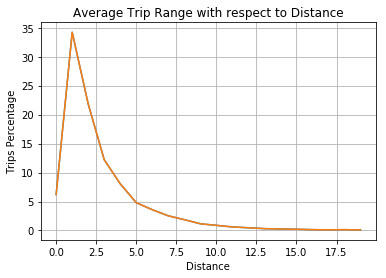

In [10]:
#Matplot lib Average Trip Range with respect to Distance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
plotdist=pd.read_csv("output/DistanceChange.csv")

ds = plotdist['Trip_distance'].tolist()
ts = plotdist['percentile'].tolist()
plt.plot(ds,ts)

plt.xlabel('Distance')
plt.ylabel('Trips Percentage')
plt.title('Average Trip Range with respect to Distance')
plt.grid(True)
plt.savefig("graph/speedChange_distance.png")
plt.show()

